In [1]:

import torch
import torch.nn as nn  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [3]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [4]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


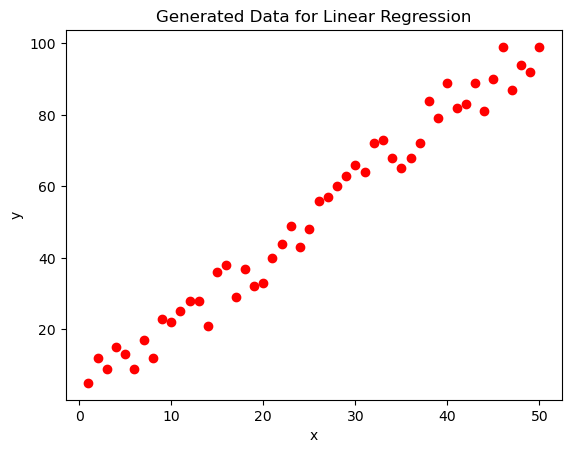

In [5]:
y = 2*X + 1 + e
plt.scatter(X.numpy(), y.numpy(),color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()


In [6]:
torch.manual_seed(59)

In [7]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [8]:
torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')

Weight: 0.10597813129425049
Bias:   0.9637961387634277
Initial Weight: 0.10597813, Initial Bias: 0.96379614



In [9]:
# Define Loss Function & Optimizer
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
# Train the Model
epochs = 50
losses = []

In [10]:
for epoch in range(1, epochs + 1):  # Loop over epochs
    y_pred = model.forward(X)
    loss = loss_function(y_pred,y)
    losses.append(loss)
    # Print loss, weight, and bias for EVERY epoch
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53112793  weight: 3.33490038  bias: 1.06046367
epoch:  3  loss: 830.29998779  weight: 1.01483274  bias: 0.99226284
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576  bias: 1.02149546
epoch: 10  loss: 28.98922920  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612625  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

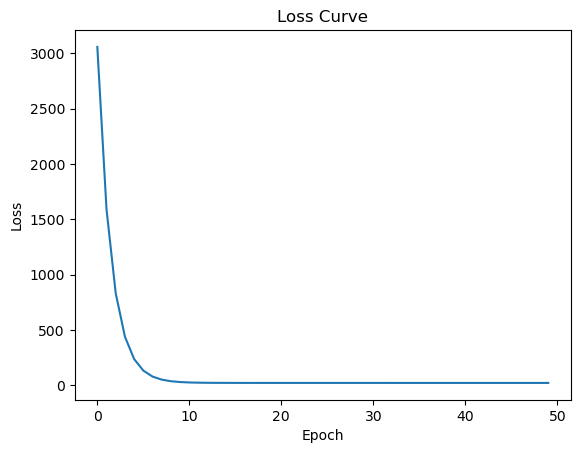

In [11]:
plt.plot(range(epochs), [l.item() for l in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [12]:
# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Final Weight: 1.98381913, Final Bias: 1.05575156


In [13]:
x1 = torch.tensor([X.min().item(), X.max().item()]) 
y1 = x1 * final_weight + final_bias

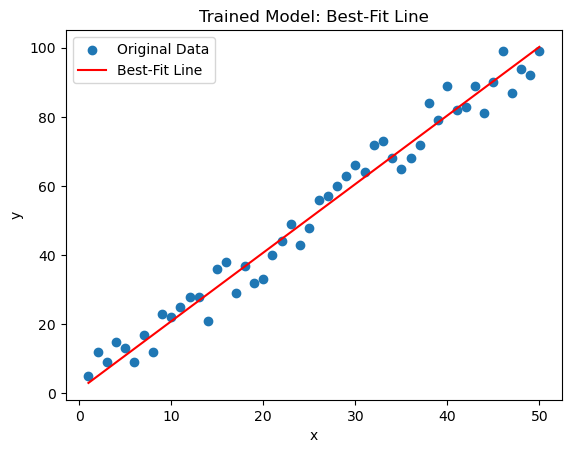

In [14]:
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [15]:
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Prediction for x = 120: 239.11404419
